# Dataset Inspection: All Extracted Datasets

Overzicht van alle lokaal opgeslagen datasets uit `run_all_extractions.py`.

**Combinaties:**
- Database: MIMIC, AUMCdb (2)
- OBS days: 3, 5, 7, 14, 28 (5)
- GRID: 8, 12, 24 (3)
- INCLUSION: kdigo2, kdigo3 (2)

**Totaal:** 2 × 5 × 3 × 2 = 60 datasets

In [1]:
import json
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
DATA_BASE = Path(r"C:\Users\karel\Desktop\data\Thesis\Data")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
# Find all general_features.json files
json_files = list(DATA_BASE.glob("derived_*/Full_dataset/*_general_features.json"))
print(f"Found {len(json_files)} datasets")

# Load all features
all_features = []
for json_path in json_files:
    try:
        with open(json_path, 'r') as f:
            features = json.load(f)
            all_features.append(features)
    except Exception as e:
        print(f"Error loading {json_path.name}: {e}")

print(f"Successfully loaded {len(all_features)} datasets")

Found 60 datasets
Successfully loaded 60 datasets


In [3]:
# Create DataFrame with main features
df = pd.DataFrame(all_features)

# Sort for readability
df = df.sort_values(['database', 'inclusion', 'obs_days', 'grid_step_hours']).reset_index(drop=True)

# Select main columns for display
main_cols = [
    'database', 'inclusion', 'obs_days', 'grid_step_hours',
    'unique_stays', 'unique_persons', 'total_rows', 
    'total_actions', 'action_frequency_pct'
]

print("\n" + "="*80)
print("OVERVIEW: All Datasets")
print("="*80)
df[main_cols]


OVERVIEW: All Datasets


,database,inclusion,obs_days,grid_step_hours,unique_stays,unique_persons,total_rows,total_actions,action_frequency_pct
0,AUMCdb,kdigo2,3,8,6533,5954,44457,621,1.3969
1,AUMCdb,kdigo2,3,12,6530,5951,31226,621,1.9887
2,AUMCdb,kdigo2,3,24,6533,5953,18125,621,3.4262
3,AUMCdb,kdigo2,5,8,6530,5950,59781,672,1.1241
4,AUMCdb,kdigo2,5,12,6531,5951,41304,672,1.6270
5,AUMCdb,kdigo2,5,24,6534,5954,23040,672,2.9167
6,AUMCdb,kdigo2,7,8,6533,5953,71731,689,0.9605
7,AUMCdb,kdigo2,7,12,6533,5951,49190,689,1.4007
8,AUMCdb,kdigo2,7,24,6534,5953,26853,689,2.5658
9,AUMCdb,kdigo2,14,8,6535,5953,99116,734,0.7405


In [4]:
# Summary statistics per database
print("\n" + "="*80)
print("SUMMARY BY DATABASE")
print("="*80)

summary_db = df.groupby('database').agg({
    'unique_stays': ['min', 'max', 'mean'],
    'total_rows': ['min', 'max', 'mean'],
    'action_frequency_pct': ['min', 'max', 'mean']
}).round(2)

print(summary_db)


SUMMARY BY DATABASE
         unique_stays                 total_rows                     \
                  min    max     mean        min     max       mean   
database                                                              
AUMCdb           1823   6535   4179.5       4500  124551   33873.07   
MIMIC           11879  36052  23965.5      37283  444990  168516.53   

         action_frequency_pct               
                          min    max  mean  
database                                    
AUMCdb                   0.60  11.69  3.61  
MIMIC                    0.54   5.05  1.90  


In [5]:
# Summary by inclusion criteria
print("\n" + "="*80)
print("SUMMARY BY INCLUSION CRITERIA")
print("="*80)

summary_incl = df.groupby(['database', 'inclusion']).agg({
    'unique_stays': 'mean',
    'total_rows': 'mean',
    'action_frequency_pct': 'mean'
}).round(2)

print(summary_incl)


SUMMARY BY INCLUSION CRITERIA
                    unique_stays  total_rows  action_frequency_pct
database inclusion                                                
AUMCdb   kdigo2          6533.13    54711.33                  1.63
         kdigo3          1825.87    13034.80                  5.59
MIMIC    kdigo2         36052.00   251904.40                  0.99
         kdigo3         11879.00    85128.67                  2.81


In [6]:
# Summary by obs_days
print("\n" + "="*80)
print("SUMMARY BY OBSERVATION WINDOW (days)")
print("="*80)

summary_obs = df.groupby(['database', 'obs_days']).agg({
    'unique_stays': 'mean',
    'total_rows': 'mean',
    'action_frequency_pct': 'mean'
}).round(2)

print(summary_obs)


SUMMARY BY OBSERVATION WINDOW (days)
                   unique_stays  total_rows  action_frequency_pct
database obs_days                                                
AUMCdb   3              4178.17    19458.00                  5.04
         5              4178.83    25655.50                  4.21
         7              4179.83    30506.33                  3.65
         14             4180.50    41655.33                  2.84
         28             4180.17    52090.17                  2.32
MIMIC    3             23965.50   119898.33                  2.29
         5             23965.50   148378.83                  2.03
         7             23965.50   166262.50                  1.89
         14            23965.50   196329.33                  1.69
         28            23965.50   211713.67                  1.60


In [7]:
# Summary by grid step
print("\n" + "="*80)
print("SUMMARY BY GRID STEP (hours)")
print("="*80)

summary_grid = df.groupby(['database', 'grid_step_hours']).agg({
    'unique_stays': 'mean',
    'total_rows': 'mean',
    'action_frequency_pct': 'mean'
}).round(2)

print(summary_grid)


SUMMARY BY GRID STEP (hours)
                          unique_stays  total_rows  action_frequency_pct
database grid_step_hours                                                
AUMCdb   8                      4179.5     49440.4                  2.15
         12                     4179.1     33841.7                  3.11
         24                     4179.9     18337.1                  5.57
MIMIC    8                     23965.5    235581.0                  1.20
         12                    23965.5    168420.2                  1.68
         24                    23965.5    101548.4                  2.82


In [8]:
# Extract terminal events
terminal_data = []
for feat in all_features:
    term_events = feat.get('terminal_events_total', {})
    terminal_data.append({
        'dataset_name': feat['dataset_name'],
        'database': feat['database'],
        'inclusion': feat['inclusion'],
        'obs_days': feat['obs_days'],
        'grid_step_hours': feat['grid_step_hours'],
        'death': term_events.get('death', 0),
        'discharge': term_events.get('discharge', 0),
        'rrt_start': term_events.get('rrt_start', 0),
        'window_end': term_events.get('window_end', 0),
    })

df_terminal = pd.DataFrame(terminal_data)
df_terminal['total_episodes'] = df_terminal[['death', 'discharge', 'rrt_start', 'window_end']].sum(axis=1)

# Calculate percentages
for col in ['death', 'discharge', 'rrt_start', 'window_end']:
    df_terminal[f'{col}_pct'] = (df_terminal[col] / df_terminal['total_episodes'] * 100).round(1)

print("\n" + "="*80)
print("TERMINAL EVENTS DISTRIBUTION")
print("="*80)

term_cols = ['database', 'inclusion', 'obs_days', 'grid_step_hours', 
             'death', 'discharge', 'rrt_start', 'window_end', 'total_episodes']
df_terminal[term_cols].sort_values(['database', 'inclusion', 'obs_days', 'grid_step_hours'])


TERMINAL EVENTS DISTRIBUTION


,database,inclusion,obs_days,grid_step_hours,death,discharge,rrt_start,window_end,total_episodes
16,AUMCdb,kdigo2,3,8,499,2408,621,3005,6533
12,AUMCdb,kdigo2,3,12,501,2404,621,3004,6530
14,AUMCdb,kdigo2,3,24,499,2412,621,3001,6533
22,AUMCdb,kdigo2,5,8,582,2982,672,2294,6530
18,AUMCdb,kdigo2,5,12,583,2984,672,2292,6531
20,AUMCdb,kdigo2,5,24,582,2985,672,2295,6534
28,AUMCdb,kdigo2,7,8,659,3389,689,1796,6533
24,AUMCdb,kdigo2,7,12,660,3387,689,1797,6533
26,AUMCdb,kdigo2,7,24,659,3388,689,1798,6534
4,AUMCdb,kdigo2,14,8,782,4052,734,967,6535


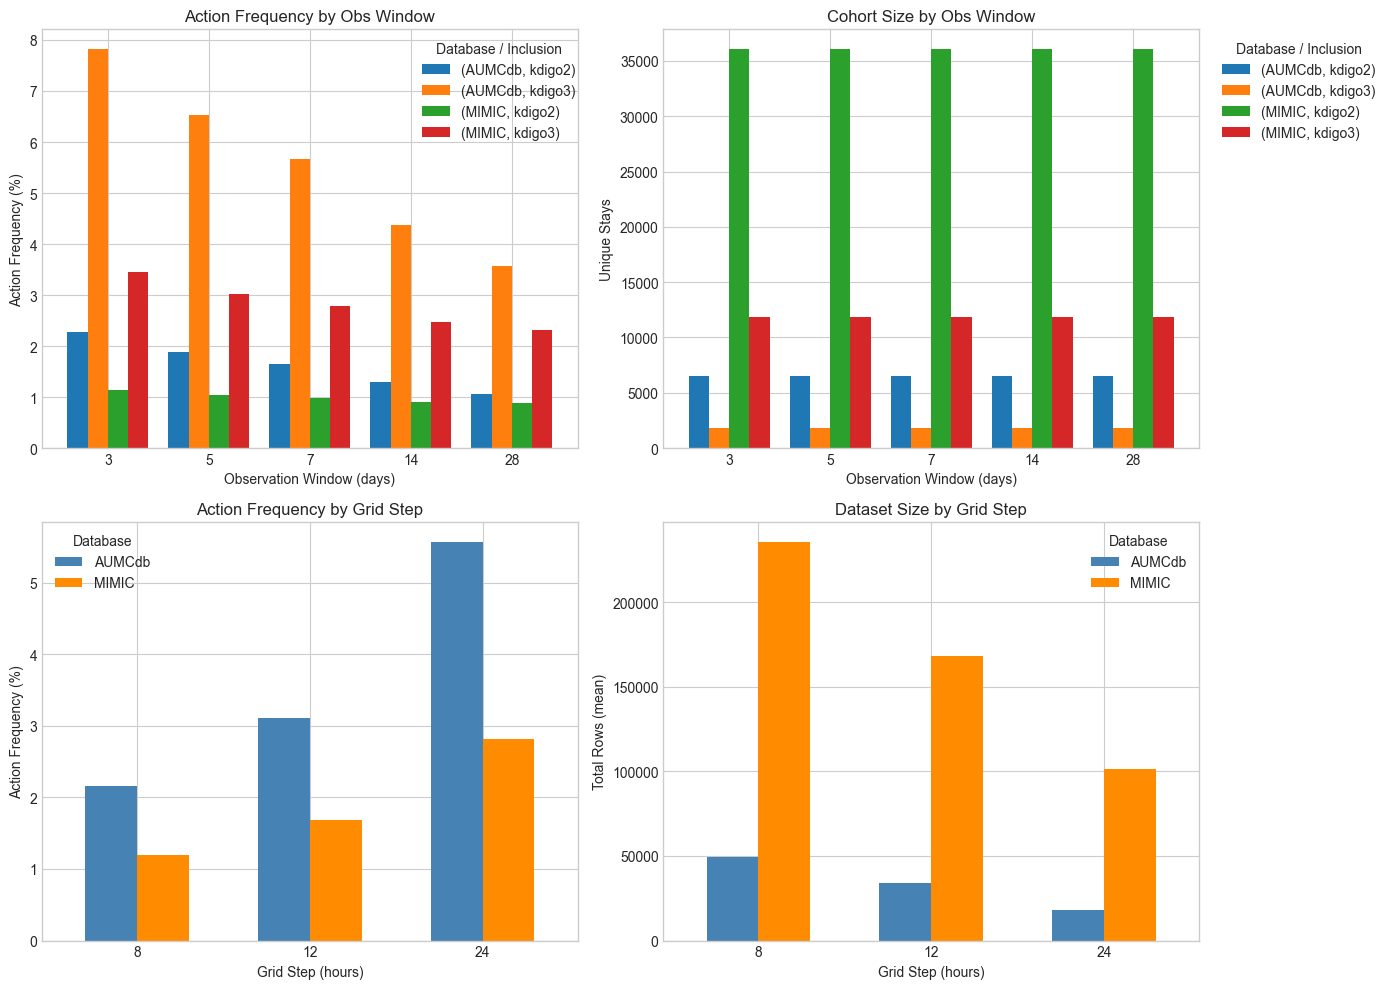

In [9]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Action frequency by database and inclusion
ax1 = axes[0, 0]
pivot1 = df.pivot_table(values='action_frequency_pct', 
                        index='obs_days', 
                        columns=['database', 'inclusion'], 
                        aggfunc='mean')
pivot1.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_xlabel('Observation Window (days)')
ax1.set_ylabel('Action Frequency (%)')
ax1.set_title('Action Frequency by Obs Window')
ax1.legend(title='Database / Inclusion', bbox_to_anchor=(1.02, 1))
ax1.tick_params(axis='x', rotation=0)

# 2. Number of stays by database and inclusion
ax2 = axes[0, 1]
pivot2 = df.pivot_table(values='unique_stays', 
                        index='obs_days', 
                        columns=['database', 'inclusion'], 
                        aggfunc='mean')
pivot2.plot(kind='bar', ax=ax2, width=0.8)
ax2.set_xlabel('Observation Window (days)')
ax2.set_ylabel('Unique Stays')
ax2.set_title('Cohort Size by Obs Window')
ax2.legend(title='Database / Inclusion', bbox_to_anchor=(1.02, 1))
ax2.tick_params(axis='x', rotation=0)

# 3. Action frequency by grid step
ax3 = axes[1, 0]
pivot3 = df.pivot_table(values='action_frequency_pct', 
                        index='grid_step_hours', 
                        columns='database', 
                        aggfunc='mean')
pivot3.plot(kind='bar', ax=ax3, width=0.6, color=['steelblue', 'darkorange'])
ax3.set_xlabel('Grid Step (hours)')
ax3.set_ylabel('Action Frequency (%)')
ax3.set_title('Action Frequency by Grid Step')
ax3.legend(title='Database')
ax3.tick_params(axis='x', rotation=0)

# 4. Total rows by grid step
ax4 = axes[1, 1]
pivot4 = df.pivot_table(values='total_rows', 
                        index='grid_step_hours', 
                        columns='database', 
                        aggfunc='mean')
pivot4.plot(kind='bar', ax=ax4, width=0.6, color=['steelblue', 'darkorange'])
ax4.set_xlabel('Grid Step (hours)')
ax4.set_ylabel('Total Rows (mean)')
ax4.set_title('Dataset Size by Grid Step')
ax4.legend(title='Database')
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig(DATA_BASE / 'dataset_overview.png', dpi=150, bbox_inches='tight')
plt.show()

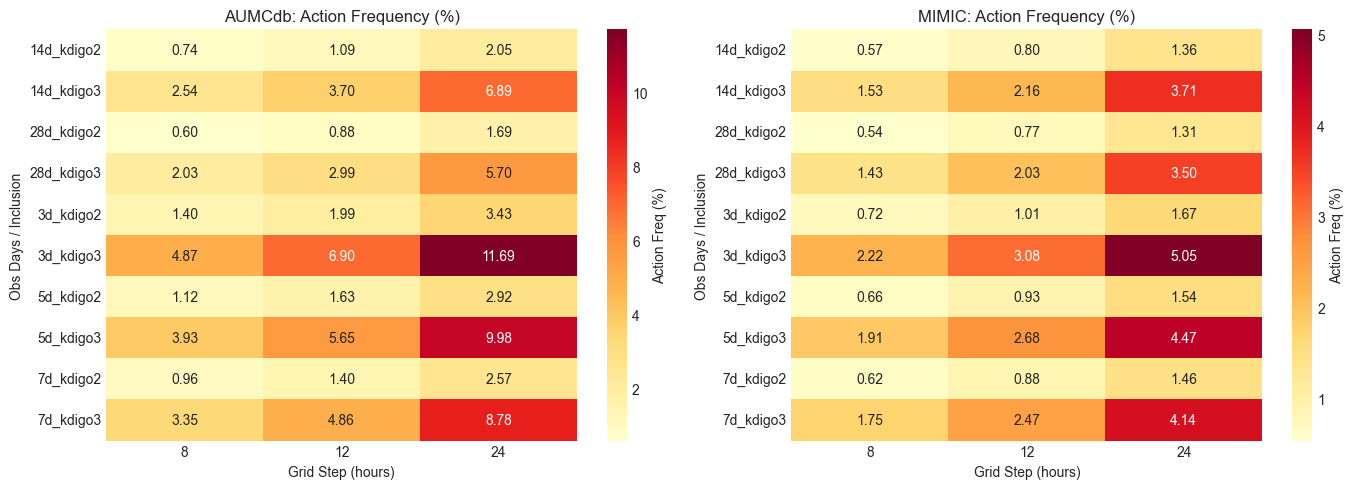

In [10]:
# Heatmap: Action frequency
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, db in enumerate(['AUMCdb', 'MIMIC']):
    df_db = df[df['database'] == db]
    
    # Combine obs_days and inclusion for rows
    df_db = df_db.copy()
    df_db['obs_incl'] = df_db['obs_days'].astype(str) + 'd_' + df_db['inclusion']
    
    pivot = df_db.pivot_table(values='action_frequency_pct',
                              index='obs_incl',
                              columns='grid_step_hours')
    
    sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[i],
                cbar_kws={'label': 'Action Freq (%)'})
    axes[i].set_title(f'{db}: Action Frequency (%)')
    axes[i].set_xlabel('Grid Step (hours)')
    axes[i].set_ylabel('Obs Days / Inclusion')

plt.tight_layout()
plt.savefig(DATA_BASE / 'action_frequency_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

In [11]:
# Terminal events summary
print("\n" + "="*80)
print("TERMINAL EVENTS SUMMARY (mean %)")
print("="*80)

term_summary = df_terminal.groupby(['database', 'inclusion']).agg({
    'death_pct': 'mean',
    'discharge_pct': 'mean',
    'rrt_start_pct': 'mean',
    'window_end_pct': 'mean',
}).round(1)

print(term_summary)


TERMINAL EVENTS SUMMARY (mean %)
                    death_pct  discharge_pct  rrt_start_pct  window_end_pct
database inclusion                                                         
AUMCdb   kdigo2          10.4           53.2           10.6            25.8
         kdigo3          15.4           32.3           31.1            21.2
MIMIC    kdigo2           6.5           72.3            5.8            15.3
         kdigo3          11.0           55.5           16.8            16.7


In [12]:
# Key findings
print("\n" + "="*80)
print("KEY FINDINGS")
print("="*80)

# Highest action frequency
max_action = df.loc[df['action_frequency_pct'].idxmax()]
print(f"\nHighest action frequency: {max_action['action_frequency_pct']:.2f}%")
print(f"  Dataset: {max_action['dataset_name']}")

# Lowest action frequency
min_action = df.loc[df['action_frequency_pct'].idxmin()]
print(f"\nLowest action frequency: {min_action['action_frequency_pct']:.2f}%")
print(f"  Dataset: {min_action['dataset_name']}")

# Largest cohort
max_stays = df.loc[df['unique_stays'].idxmax()]
print(f"\nLargest cohort: {max_stays['unique_stays']:,} stays")
print(f"  Dataset: {max_stays['dataset_name']}")

# Most data points
max_rows = df.loc[df['total_rows'].idxmax()]
print(f"\nMost data points: {max_rows['total_rows']:,} rows")
print(f"  Dataset: {max_rows['dataset_name']}")

print("\n" + "="*80)


KEY FINDINGS

Highest action frequency: 11.69%
  Dataset: derived_AUMCdb_obs3_grid24_kdigo3

Lowest action frequency: 0.54%
  Dataset: derived_MIMIC_obs28_grid8_kdigo2

Largest cohort: 36,052 stays
  Dataset: derived_MIMIC_obs3_grid8_kdigo2

Most data points: 444,990 rows
  Dataset: derived_MIMIC_obs28_grid8_kdigo2



In [13]:
# Save summary to CSV
output_path = DATA_BASE / 'all_datasets_summary.csv'
df.to_csv(output_path, index=False)
print(f"Summary saved to: {output_path}")

# Save terminal events to CSV
terminal_path = DATA_BASE / 'all_datasets_terminal_events.csv'
df_terminal.to_csv(terminal_path, index=False)
print(f"Terminal events saved to: {terminal_path}")

Summary saved to: C:\Users\karel\Desktop\data\Thesis\Data\all_datasets_summary.csv
Terminal events saved to: C:\Users\karel\Desktop\data\Thesis\Data\all_datasets_terminal_events.csv
